<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Iowa Liquor Sales 

---

In this project, you will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in the first half of Project 2. 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
# check the iowa file location for your computer 
iowa_file = '/users/Gene/Desktop/gzdsi7/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)
print "Dataframe is of size: " + str(iowa.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [5]:
iowa.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40


In [6]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [7]:
iowa.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [8]:
iowa['Zip Code'].unique()

array(['50674', '52807', '50613', '50010', '50421', '52402', '52501',
       '50428', '50035', '52332', '50265', '52577', '52806', '52656',
       '52241', '50703', '50208', '52342', '51250', '50401', '51351',
       '52246', '51501', '50111', '52245', '52632', '50125', '50501',
       '50311', '50317', '50124', '52804', '50320', '50651', '50129',
       '50021', '52224', '50533', '50212', '52060', '51401', '50595',
       '51104', '52404', '52353', '50616', '52057', '51201', '50009',
       '50588', '52802', '51503', '50638', '51106', '51360', '52001',
       '50250', '51461', '52641', '52303', '50115', '52144', '51301',
       '52761', '50851', '51555', '52240', '50126', '50511', '50310',
       '50263', '50314', '52753', '50701', '50140', '52732', '50665',
       '52601', '712-2', '51041', '51455', '51453', '52405', '52302',
       '50023', '50131', '50662', '52310', '50423', '52208', '52361',
       '50201', '50003', '50315', '52136', '52544', '52556', '51334',
       '50158', '527

In [9]:
rows_with_dashes = iowa['Zip Code'].str.contains('-').fillna(False)
len(iowa[rows_with_dashes])

217

In [10]:
iowa.drop(iowa.index[rows_with_dashes], inplace = True)

In [11]:
iowa['Zip Code'].unique()

array(['50674', '52807', '50613', '50010', '50421', '52402', '52501',
       '50428', '50035', '52332', '50265', '52577', '52806', '52656',
       '52241', '50703', '50208', '52342', '51250', '50401', '51351',
       '52246', '51501', '50111', '52245', '52632', '50125', '50501',
       '50311', '50317', '50124', '52804', '50320', '50651', '50129',
       '50021', '52224', '50533', '50212', '52060', '51401', '50595',
       '51104', '52404', '52353', '50616', '52057', '51201', '50009',
       '50588', '52802', '51503', '50638', '51106', '51360', '52001',
       '50250', '51461', '52641', '52303', '50115', '52144', '51301',
       '52761', '50851', '51555', '52240', '50126', '50511', '50310',
       '50263', '50314', '52753', '50701', '50140', '52732', '50665',
       '52601', '51041', '51455', '51453', '52405', '52302', '50023',
       '50131', '50662', '52310', '50423', '52208', '52361', '50201',
       '50003', '50315', '52136', '52544', '52556', '51334', '50158',
       '52778', '516

In [12]:
iowa['Category'].dropna()

0         1051100.0
1         1011100.0
2         1011200.0
3         1071100.0
4         1031080.0
5         1041100.0
6         1051010.0
7         1012100.0
8         1032080.0
9         1081315.0
10        1011250.0
11        1071100.0
12        1012100.0
13        1081300.0
14        1031200.0
15        1051100.0
16        1031100.0
17        1031200.0
18        1081700.0
19        1012100.0
20        1031200.0
21        1012100.0
22        1011100.0
23        1022100.0
24        1031080.0
25        1011300.0
26        1012100.0
27        1011100.0
28        1031080.0
29        1081600.0
            ...    
270925    1081200.0
270926    1022100.0
270927    1031200.0
270928    1031080.0
270929    1031080.0
270930    1031080.0
270931    1081900.0
270932    1011300.0
270933    1062310.0
270934    1051110.0
270935    1011300.0
270936    1022100.0
270937    1082900.0
270938    1031080.0
270939    1031200.0
270940    1012200.0
270941    1031080.0
270942    1011100.0
270943    1011200.0


In [13]:
iowa = iowa[pd.notnull(iowa['Category'])]

In [14]:
iowa['Category'].unique()

array([ 1051100.,  1011100.,  1011200.,  1071100.,  1031080.,  1041100.,
        1051010.,  1012100.,  1032080.,  1081315.,  1011250.,  1081300.,
        1031200.,  1031100.,  1081700.,  1022100.,  1011300.,  1081600.,
        1081900.,  1081305.,  1051120.,  1082900.,  1042100.,  1081370.,
        1051110.,  1012210.,  1062200.,  1062310.,  1081200.,  1012200.,
        1032200.,  1012300.,  1062300.,  1052010.,  1081350.,  1081335.,
        1081400.,  1081010.,  1081390.,  1011500.,  1081330.,  1051150.,
        1081355.,  1101100.,  1062100.,  1062050.,  1081030.,  1081340.,
        1701100.,  1081317.,  1031090.,  1022200.,  1052100.,  1081015.,
        1081312.,  1081020.,  1081210.,  1081500.,  1051140.,  1041150.,
        1081380.,  1082100.,  1081250.,  1081230.,  1081365.,  1081240.,
        1032100.,  1031110.,  1041200.,  1081220.,  1012400.,  1011400.,
        1091100.,  1062500.,  1091300.,  1082200.,  1011600.,  1501100.,
        1062400.,  1011700.,  1092100.,  1082010., 

In [16]:
iowa['Category'] = iowa['Category'].astype(int)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
iowa = iowa[pd.notnull(iowa['County Number'])]

In [18]:
iowa['County Number'].unique()

array([  9.,  82.,   7.,  85.,  99.,  57.,  90.,  17.,  77.,   6.,  62.,
        56.,  52.,  50.,  86.,  84.,  30.,  78.,  91.,  94.,   8.,  49.,
        14.,  40.,  97.,  92.,  34.,  28.,  71.,  11.,  38.,  31.,   1.,
        24.,  44.,  39.,  96.,  21.,  70.,  87.,  43.,  42.,  55.,  25.,
        27.,  23.,  12.,  29.,  13.,  33.,  53.,  41.,  48.,  45.,   4.,
        51.,  32.,  64.,  73.,  16.,  22.,  81.,  67.,   3.,  95.,  79.,
        63.,  10.,  35.,  18.,  46.,  37.,  54.,  75.,  83.,  20.,  74.,
        15.,  60.,  76.,  47.,  88.,  36.,  69.,  58.,  66.,  65.,  61.,
        26.,  59.,   5.,  93.,  72.,  19.,  89.,  98.,  68.,   2.,  80.])

In [19]:
iowa = iowa[pd.notnull(iowa)]

In [20]:
iowa['County'].unique()

array(['Bremer', 'Scott', 'Black Hawk', 'Story', 'Wright', 'Linn',
       'Wapello', 'Cerro Gordo', 'Polk', 'Benton', 'Mahaska', 'Lee',
       'Johnson', 'Jasper', 'Tama', 'Sioux', 'Dickinson', 'Pottawattamie',
       'Warren', 'Webster', 'Boone', 'Jackson', 'Carroll', 'Hamilton',
       'Woodbury', 'Washington', 'Floyd', 'Delaware', "O'Brien",
       'Buena Vista', 'Grundy', 'Dubuque', 'Adair', 'Crawford', 'Henry',
       'Guthrie', 'Winneshiek', 'Clay', 'Muscatine', 'Taylor', 'Harrison',
       'Hardin', 'Kossuth', 'Dallas', 'Decatur', 'Clinton', 'Butler',
       'Des Moines', 'Calhoun', 'Fayette', 'Jones', 'Hancock', 'Iowa',
       'Howard', 'Appanoose', 'Jefferson', 'Emmet', 'Marshall', 'Page',
       'Cedar', 'Clayton', 'Sac', 'Monona', 'Allamakee', 'Winnebago',
       'Poweshiek', 'Marion', 'Buchanan', 'Franklin', 'Cherokee',
       'Humboldt', 'Greene', 'Keokuk', 'Plymouth', 'Shelby', 'Clarke',
       'Palo Alto', 'Cass', 'Lyon', 'Pocahontas', 'Ida', 'Union',
       'Fremont', '

In [21]:
iowa['County Number'] = iowa['County Number'].astype(int)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [22]:
area code 712 instead of zipcode

SyntaxError: invalid syntax (<ipython-input-22-6eae0460448d>, line 1)

### 3.2 Clean the columns

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [23]:
iowa

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85,Story,1071100,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99,Wright,1031080,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57,Linn,1041100,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90,Wapello,1051010,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17,Cerro Gordo,1012100,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77,Polk,1032080,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6,Benton,1081315,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [24]:
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number              int64
County                    object
Category                   int64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [25]:
iowa['Date'] = pd.to_datetime(iowa.Date)

In [26]:
iowa[['State Bottle Cost']] = iowa[['State Bottle Cost']].replace('[\$,]','',regex=True).astype(float)
iowa[['State Bottle Retail']] = iowa[['State Bottle Retail']].replace('[\$,]','',regex=True).astype(float)
iowa[['Sale (Dollars)']] = iowa[['Sale (Dollars)']].replace('[\$,]','',regex=True).astype(float)

In [27]:
iowa['year'] = iowa.Date.dt.year

In [28]:
year = iowa.Date.dt.year

In [29]:
month = iowa.Date.dt.month

In [30]:
quarter = iowa.Date.dt.quarter

In [31]:
table = pd.pivot_table(iowa, values='Sale (Dollars)', index=['Store Number'], columns=['year',quarter], aggfunc=np.sum)


In [32]:
cleantable = table.drop(year[2016],axis = 1)

In [33]:
cleantable = cleantable.dropna()

In [34]:
cleantable['sum_total'] = cleantable.iloc[:,0:5].sum(axis = 1)

In [35]:
cleantable

year              2015                                sum_total
Date                 1         2         3         4           
Store Number                                                   
2106          39287.29  31173.46  38324.77  37540.70  146326.22
2113           2833.25   1994.30   2113.56   2369.11    9310.22
2130          24272.57  35038.09  24605.88  27954.89  111871.43
2152           2003.46   1398.92   2246.70   2072.00    7721.08
2178           5856.41   6986.33   5668.15   5813.29   24324.18
2190          29452.92  36029.14  23420.32  32786.68  121689.06
2191          29085.57  51033.37  24990.22  19984.33  125093.49
2200           4900.43   7034.79   4229.73   6646.60   22811.55
2205           6407.74   5554.34   6140.74   6520.19   24623.01
2228           5193.97   4104.73   3633.95   4529.42   17462.07
2233           5374.55   9555.37   6433.65   8189.77   29553.34
2238            858.61   4860.57   5580.90    462.48   11762.56
2248          12663.68  18759.67  14266.00  21992.71   67682.06
2285          10019.12  15486.00  27323.89  24098.10   76927.11
2290          12191.26  14850.89  12076.24  17396.04   56514.43
2327           2253.60   2015.54   3504.52   2471.48   10245.14
2353          17382.60  10808.84  13196.91  11960.84   53349.19
2413          22459.16  25001.60  23505.03  19099.23   90065.02
2445           1215.08   2013.51   1574.91   2385.98    7189.48
2448           5655.92   3144.14   4290.84   4649.80   17740.70
2459           1609.57   1503.49   1642.35   2596.92    7352.33
2460           6746.61   8658.28   7314.13  11012.74   33731.76
2465           5615.99   4843.49   8638.83   6733.49   25831.80
2475           5672.76   1241.42   1793.49   1973.40   10681.07
2478           4459.85   7313.17   3918.52   4149.11   19840.65
2487           7256.60  10285.56   9481.21   1877.59   28900.96
2498            279.22    651.67   1040.00    288.78    2259.67
2500          40234.90  29326.20  52744.26  26816.27  149121.63
2501          31412.95  34085.38  30449.92  48885.41  144833.66
2502          39420.06  32418.87  25846.96  52408.12  150094.01
...                ...       ...       ...       ...        ...
5083             74.40    811.20    435.42   1243.38    2564.40
5086            810.60   2152.30   1493.49   1953.96    6410.35
5088            479.16    989.48    428.28    118.53    2015.45
5089            884.03    747.14    686.48    880.59    3198.24
5090           2193.89    498.42    242.14    893.34    3827.79
5091            523.82    368.94    519.24    656.66    2068.66
5092           1815.54    845.49   2027.30   1128.41    5816.74
5093           2430.57   1937.94   2216.27   2181.76    8766.54
5094            511.86    258.24    205.80    408.42    1384.32
5096           2040.42   1608.24   1248.54   1813.98    6711.18
5097           3160.02   2543.26   1628.64   1040.10    8372.02
5098           1360.74   3445.84   1743.42   3269.41    9819.41
5099           1250.49    457.68    777.16    468.50    2953.83
5100           2180.76   2919.12   3366.59   3306.08   11772.55
5101           1701.47   2855.03   2653.29   2932.31   10142.10
5102          27695.76  45252.87  50548.41  60833.12  184330.16
5103             42.76    285.62    394.87    280.92    1004.17
5104           1555.83   4355.25   3488.03    614.58   10013.69
5105           2708.56  16896.31  13652.10  15577.48   48834.45
5106           2691.84   6038.28   7572.66   7776.34   24079.12
5108            999.95   1719.61   1765.89   2214.89    6700.34
5112            803.56    830.03   1022.34   1563.42    4219.35
5113           2427.84   1990.56   3067.47   4004.16   11490.03
5114            406.02    799.08    188.28    195.72    1589.10
5115            601.02    413.46    538.88    651.78    2205.14
5116           1406.57   3566.54   4069.76   4235.30   13278.17
5119            112.50    743.00    573.22   1262.22    2690.94
5128            477.00   6798.43   5967.36   6642.69   19885.48
9001           2341.08   2234.46

In [36]:
mtable = pd.pivot_table(iowa, values='Sale (Dollars)', index=['Store Number'], columns=['year',month], aggfunc=np.sum)


In [37]:
mtable = mtable.drop(year[2016], axis = 1)

In [38]:
mtable = mtable.dropna()

In [39]:
#mtable = mtable.reset_index(col_level = 1)
mtable['sum_total'] = mtable.iloc[:,0:5].sum(axis = 1)

In [40]:
mtable

year              2015                                                    \
Date                 1         2         3         4         5         6   
Store Number                                                               
2106          13567.80  12873.14  12846.35  11957.86   7526.88  11688.72   
2113            813.68    713.59   1305.98    414.15    727.69    852.46   
2130           7725.66   8655.08   7891.83  13738.75  13612.92   7686.42   
2152           1096.72    589.59    317.15    231.52    783.02    384.38   
2178           2251.52   1427.65   2177.24   1255.40   2672.73   3058.20   
2190           7970.12   8483.27  12999.53  16683.99   7676.97  11668.18   
2191           6777.38  13905.46   8402.73  29243.73  10270.45  11519.19   
2200           1731.96   1767.09   1401.38   2143.45   2544.57   2346.77   
2205           2968.70   2015.54   1423.50   1284.29   2108.05   2162.00   
2228           1298.01   1492.87   2403.09   2026.92    650.31   1427.50   
2233           1196.52   1564.27   2613.76   2081.04   2030.67   5443.66   
2248           3740.80   4995.44   3927.44   6253.50   6038.40   6467.77   
2285           3497.36   3783.06   2738.70   5360.09   4061.38   6064.53   
2290           4647.91   4837.52   2705.83   4008.16   5442.31   5400.42   
2327            473.31    537.34   1242.95    282.12   1017.55    715.87   
2353           2646.58  11772.40   2963.62   3574.24   4945.76   2288.84   
2413           8881.83   4156.43   9420.90   8229.67   6662.62  10109.31   
2445            562.44    242.20    410.44    444.78    514.71   1054.02   
2448           2152.80   1078.36   2424.76   1057.88    648.90   1437.36   
2459            409.87    106.60   1093.10    188.07    368.51    946.91   
2460           1693.15   2688.00   2365.46   1669.61   4677.39   2311.28   
2465           1793.54   2387.41   1435.04   2008.70    988.27   1846.52   
2475            775.62    335.19   4561.95    238.47    524.25    478.70   
2478           1454.57   1136.28   1869.00   2614.92   1610.04   3088.21   
2500          21660.27   9056.39   9518.24  14417.42   5975.91   8932.87   
2501          10537.68  10476.23  10399.04  14475.73  10476.07   9133.58   
2502          16467.08  11115.26  11837.72  16799.01   5300.97  10318.89   
2505           3754.28   6142.67   4662.33   4469.27  13039.55   6380.97   
2506          11647.49  10133.04   9229.24   8580.02  10309.83  14317.31   
2507           2663.75   2099.62   3580.64   2551.59   2244.52   2307.08   
...                ...       ...       ...       ...       ...       ...   
5010            843.75    351.60    327.15    396.39    851.64    637.62   
5011            168.60    476.28    427.47    365.17    413.04    261.21   
5012            609.03    615.28    224.60    110.87    308.86    168.04   
5013           1853.20    381.12    591.85    156.04    369.03    409.73   
5017            639.48    293.64    324.08    543.21    631.61    791.30   
5018            909.02   1300.87   2803.62   2520.96   1084.49   1235.47   
5022             86.94    481.87    616.02    464.27    660.43    775.73   
5027            173.76   1004.70    540.41    473.28     64.56    716.04   
5028            879.24   1024.80     90.00    528.24   1556.16    612.70   
5029           2712.06   2323.65   1131.00   2921.49   2956.06   2350.72   
5034           1962.73   1262.19    698.59   2293.74    721.33   1378.65   
5037            925.45    830.59    537.70    964.54    404.04    417.76   
5042            172.10    703.82    947.26   1306.80    526.35   1324.62   
5043            735.48   1114.92   1322.86   2403.72    794.94   1396.42   
5051           1110.03    599.17    187.16    562.42    388.11    426.97   
5054           3334.27   2843.54   4365.35   2198.46   2801.73   4341.59   
5057            267.96    414.30     59.31    297.62    773.10    248.39   
5060            652.20    111.58    534.60    365.76    415.32    675.72   
5063            787.01    290.46   3484.88   135

### 5.2 Calculate the profit each store is making in 2015.


In [41]:
iowa[['State Bottle Cost']] = iowa[['State Bottle Cost']].replace('[\$,]','',regex=True).astype(float)
iowa[['State Bottle Retail']] = iowa[['State Bottle Retail']].replace('[\$,]','',regex=True).astype(float)
iowa[['Sale (Dollars)']] = iowa[['Sale (Dollars)']].replace('[\$,]','',regex=True).astype(float)

In [42]:
iowa['profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']) * iowa['Bottles Sold']

In [43]:
prof_table = pd.pivot_table(iowa, values=('profit'), index=['Store Number'], columns=['year',quarter], aggfunc=np.sum)


In [44]:
prof_table = prof_table.drop(year[2016], axis = 1)

In [45]:
prof_table = prof_table.dropna()

In [46]:
prof_table['sum_total'] = prof_table.iloc[:,0:5].sum(axis = 1)

In [47]:
prof_table

year              2015                               sum_total
Date                 1         2         3         4          
Store Number                                                  
2106          13108.37  10420.43  12787.25  12522.03  48838.08
2113            944.72    664.99    704.77    794.56   3109.04
2130           8108.68  11689.39   8204.60   9322.53  37325.20
2152            668.60    470.86    752.36    695.71   2587.53
2178           1961.28   2372.80   1890.11   1941.51   8165.70
2190           9828.30  12024.27   7820.29  10944.87  40617.73
2191           9723.40  17013.04   8332.12   6675.83  41744.39
2200           1641.80   2366.97   1410.47   2234.23   7653.47
2205           2138.97   1855.17   2048.40   2182.13   8224.67
2228           1736.43   1370.19   1216.36   1521.36   5844.34
2233           1796.01   3186.49   2146.25   2737.91   9866.66
2238            286.28   1621.03   1861.02    154.32   3922.65
2248           4227.24   6258.90   4761.62   7336.75  22584.51
2285           3345.90   5191.47   9113.57   8070.07  25721.01
2290           4083.72   4963.26   4027.09   5808.30  18882.37
2327            751.31    673.69   1168.50    824.17   3417.67
2353           5946.70   3622.96   4408.29   3991.66  17969.61
2413           7501.02   8350.39   7855.52   6395.89  30102.82
2445            405.69    671.80    525.16    796.54   2399.19
2448           1887.26   1048.95   1432.52   1555.78   5924.51
2459            538.07    503.86    547.75    869.40   2459.08
2460           2256.58   2932.91   2467.50   3673.59  11330.58
2465           1875.51   1617.36   2884.75   2252.20   8629.82
2475           1891.99    413.99    597.96    658.98   3562.92
2478           1486.90   2438.39   1306.64   1383.49   6615.42
2487           2427.71   3469.19   3178.39    628.28   9703.57
2498             93.13    217.33    347.51    101.45    759.42
2500          13435.42   9792.24  17603.28   8970.54  49801.48
2501          10502.76  11393.60  10186.69  16347.68  48430.73
2502          13362.26  10845.52   8631.80  17505.73  50345.31
...                ...       ...       ...       ...       ...
5083             24.84    270.60    145.22    414.84    855.50
5086            270.50    718.32    498.81    653.30   2140.93
5088            159.78    332.94    142.80     39.52    675.04
5089            294.74    249.12    229.03    293.64   1066.53
5090            735.53    166.35     80.80    297.86   1280.54
5091            178.72    123.06    173.27    218.96    694.01
5092            605.58    282.03    677.58    376.28   1941.47
5093            811.13    648.41    739.08    727.51   2926.13
5094            172.14     86.16     68.64    136.17    463.11
5096            683.46    536.28    416.28    606.90   2242.92
5097           1056.36    850.10    543.00    346.86   2796.32
5098            453.97   1149.30    581.46   1090.94   3275.67
5099            417.05    152.58    259.16    159.74    988.53
5100            727.56    974.01   1122.77   1102.96   3927.30
5101            567.27    953.61    886.48    978.90   3386.26
5102           9237.52  15097.24  16857.58  20312.30  61504.64
5103             14.26     95.24    131.68     93.68    334.86
5104            520.89   1452.98   1163.40    204.91   3342.18
5105            911.14   5649.79   4557.23   5222.99  16341.15
5106            907.68   2016.07   2526.90   2600.90   8051.55
5108            333.38    573.89    590.36    738.77   2236.40
5112            268.02    276.77    340.90    522.60   1408.29
5113            809.76    664.01   1023.27   1335.79   3832.83
5114            135.39    266.40     62.82     65.28    529.89
5115            200.34    137.83    179.75    217.32    735.24
5116            469.17   1189.52   1357.33   1413.13   4429.15
5119             37.50    247.78    192.78    426.84    904.90
5128            159.08   2277.64   1989.95   2234.22   6660.89
9001            780.48    745.14   6650.10   1227.96   9403.68
9002           1622.34   3404.2

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [48]:
iowa['vol_profit'] = ((iowa['State Bottle Retail'] - iowa['State Bottle Cost']) * iowa['Bottles Sold']) / iowa['Volume Sold (Gallons)']

In [49]:
county_prof_table = pd.pivot_table(iowa, values=('vol_profit'), index=['County'], columns=['year',quarter], aggfunc=np.sum)


In [50]:
county_prof_table = county_prof_table.drop(year[2016], axis = 1)

In [51]:
county_prof_table = county_prof_table.dropna()

In [52]:
county_prof_table['sum_total'] = county_prof_table.iloc[:,0:5].sum(axis = 1)

In [435]:
county_prof_table.sort_values('sum_total', ascending = False)

year                    2015                                               \
Date                       1              2              3              4   
County                                                                      
Polk           222375.198569  245614.698680  240870.281399  271008.691529   
Linn           101252.883333  112916.318077  111993.963197  123660.974433   
Scott           71231.104837   87091.467452   80145.473504   84848.733969   
Black Hawk      63150.348332   73382.639730   68308.986972   80010.730077   
Johnson         56289.235600   68466.048881   65759.644090   70570.435647   
Story           37630.810325   42399.407455   43219.973136   46825.090150   
Pottawattamie   39277.528987   41654.493110   39439.029575   42890.491493   
Woodbury        36061.210881   40095.892595   37878.674576   47784.956151   
Dubuque         31609.009622   33165.074877   36704.634409   37932.055778   
Cerro Gordo     22605.162265   28890.159841   29152.229287   32304.710619   
Des Moines      17830.475640   19334.762651   18972.198395   21528.535562   
Muscatine       15821.618268   18263.016844   16948.462802   20812.484051   
Clinton         14093.649952   15556.904147   15404.492053   19513.673408   
Dickinson       11508.715578   19189.446000   20180.097618   13057.615020   
Lee             15436.888243   15544.526353   15702.182395   16979.217313   
Wapello         13772.318994   16713.169819   14775.847378   17555.073777   
Webster         12458.784571   14239.645260   12658.451479   16149.244521   
Marshall        11796.940493   11489.252001   13846.683246   14669.539868   
Buena Vista     10886.933925   13164.193834   12204.199415   14842.635552   
Dallas          10807.432631   13979.207224   12335.380440   12772.639267   
Jasper          11328.387077   11934.891684   11409.044176   14099.585633   
Marion           9981.614865   11498.682652   11978.269910   13292.279954   
Warren           9714.709989    9418.028977    9398.735032   11245.077466   
Bremer           9319.848823    9704.566052    8701.508276   10314.401389   
Poweshiek        7433.853024   10000.182624    9555.306329   10380.017881   
Boone            8084.462446    9039.414047    7775.054324    9757.019102   
Carroll          7281.913643    8373.734904    9860.060198    8758.716587   
Clay             6681.787595    8966.817114    8614.342955    7900.249016   
Jones            7534.161478    8263.072594    8371.210621    7278.749645   
Kossuth          6962.522203    7477.771536    7660.185636    8124.696580   
...                      ...            ...            ...            ...   
Delaware         2234.795366    2917.131435    3557.051630    3074.220233   
Shelby           2897.938391    2965.959575    2649.578258    2888.746881   
Howard           2917.674543    2836.809465    2907.109359    2258.214063   
Ida              2093.043205    2891.824240    2415.022418    3332.302536   
Wright           2446.537938    2012.489496    2507.707167    3280.477174   
Humboldt         2211.303124    2280.451156    2418.259722    2821.510212   
Adair            2222.682712    2145.981780    2360.989512    2436.197072   
Lucas            1923.479933    2408.920099    2075.183950    1999.138542   
Grundy           1851.080315    1906.597947    1954.768171    2370.782686   
Louisa           2448.650737    2007.282620    1875.952932    1675.186993   
Pocahontas       1927.768584    1602.502783    2105.735096    2046.133997   
Mills            2033.866516    1664.050015    1880.885498    2071.100106   
Chickasaw        1588.098848    1376.231365    2108.718429    2153.317011   
Guthrie          1241.528229    1479.305504    2078.955912    1885.193482   
Osceola          2009.906568    1295.318038    1429.141278    1571.593921   
Monroe           1569.396378    1276.680600    1836.220260    1495.434796   
Calhoun          1152.420851    1899.295030    1519.391603    1324.811385   
Butler           1246.999982    1321.229637    1541.473532    1482.822103

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [137]:
total_gal_table = pd.pivot_table(iowa, values=('profit','Volume Sold (Gallons)'), index=['Store Number'], columns=[], aggfunc=np.sum)


In [138]:
total_gal_table = total_gal_table.dropna()

In [139]:
total_gal_table[total_gal_table.notnull()].head()

,Volume Sold (Gallons),profit
Store Number,,
2106,3127.28,58916.88
2113,221.03,3802.53
2130,2228.81,46517.61
2152,190.39,2891.61
2178,644.09,10034.46


In [140]:
total_gal_table.corr()

,Volume Sold (Gallons),profit
Volume Sold (Gallons),1.000000,0.992968
profit,0.992968,1.000000


### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [113]:
#iowa.select_dtypes(include = ['float'])

In [56]:
iowa = iowa[pd.notnull(iowa['Category Name'])]

In [57]:

temp_list = []



for i in iowa['Category Name']:
    if 'WHISK' in i:
        temp_list.append('Whiskey')
    elif 'BRAND' in i:
        temp_list.append('Brandy')
    elif 'VODKA' in i:
        temp_list.append('Vodka')
    elif 'TEQUILA' in i:    
        temp_list.append('Tequila')
    elif 'RUM' in i:
        temp_list.append('Rum')
    elif 'GIN' in i:
        temp_list.append('Gin')
    elif 'COCK' in i:
        temp_list.append('Cocktail')
    elif 'SCHNAPP' in i:
        temp_list.append('Schnapps')
    else:
        temp_list.append('Other')

  

In [59]:
iowa['new_cat'] = temp_list

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### 5.7 Do relationships exist between the broader liquor type and profit?

In [178]:
liq_type = pd.pivot_table(iowa, values=('profit'), index=['new_cat'], columns=[], aggfunc=np.sum)


In [179]:
melt_table = pd.melt(liq_type.reset_index(),
                     id_vars = ['new_cat'],
                     value_vars = ['profit'])

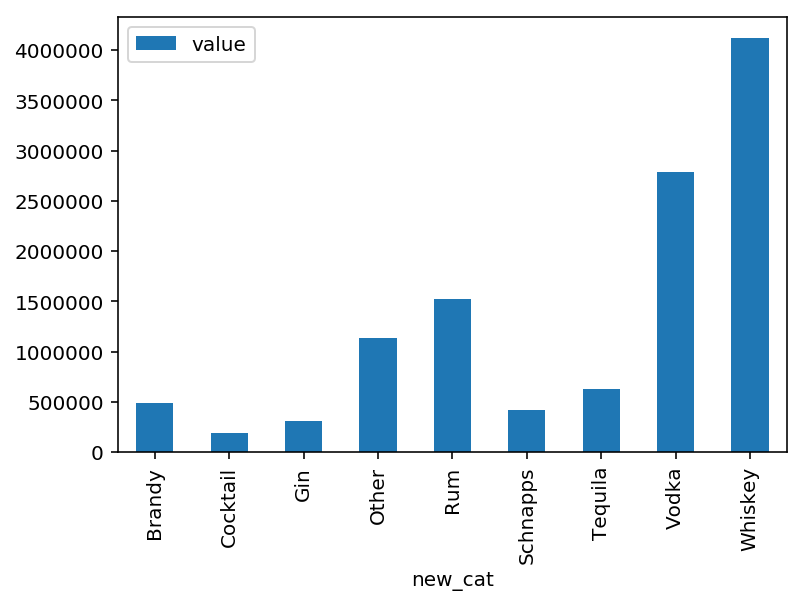

In [189]:
melt_table.plot(kind = 'bar', x = 'new_cat')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [155]:
brand = pd.pivot_table(iowa, values=('Sale (Dollars)'), index=['Item Description'], columns=[], aggfunc=np.sum)

In [156]:
brand

Item Description
10 Cane Rum                                56.25
1792 Sweet Wheat HA                       111.00
1800 Anejo Tequila                       1997.74
1800 Coconut                             1576.92
1800 Peach                               3405.75
1800 Reposado                            6620.13
1800 Reposado Tequila                   33278.46
1800 Silver                              3478.50
1800 Silver Tequila                     36317.37
1800 Ultimate Margarita                  9120.00
1800 Ultimate Raspberry                   284.80
1921 Tequila Cream                        171.00
2 Gingers                               18021.09
2 Gingers Mini                           1537.92
2 Gingers w/2 Glasses                     706.29
3-Oaks Distillery Whiskey                 162.00
360 Bing Cherry                           168.00
360 Bing Cherry Vodka                     252.00
360 Concord Grape Vodka                   168.00
360 Double Chocolate Vodka               1837.50
360

In [190]:
#brand_corr = brand['Item Description'].corr()

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
putting a tax on whiskeys and vodka

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [395]:
qtable = pd.pivot_table(iowa, values='Sale (Dollars)', index=['County','Store Number'], columns=['year',quarter], aggfunc=np.sum)


In [396]:
qtable = qtable.reset_index()

In [397]:
qtable['sum_total'] = qtable.iloc[:,0:5].sum(axis = 1)

In [359]:
qtable.iloc[0]

year          Date
County                  Adair
Store Number             3461
2015          1       1964.59
              2       3503.15
              3       3799.99
              4       2486.51
2016          1       3686.68
sum_total             12728.7
Name: 0, dtype: object

In [398]:
n_rows = qtable.shape[0]
year_2015_index = 2
year_2016_index = -2
for row_i in range(0,n_rows):
    print qtable.iloc[row_i][year_2016_index]/qtable.iloc[row_i][year_2015_index]
    break

1.87656457581


In [401]:
test_col = [-((1- (qtable.iloc[row_i][year_2016_index]/qtable.iloc[row_i][year_2015_index]))) for row_i in range(0,n_rows)] 

In [403]:
qtable['growth'] = test_col

In [408]:
qtable = qtable.dropna()

In [428]:
qtable = qtable[qtable.growth > 0]

In [433]:
qtable = qtable.sort(columns = 'growth', ascending = False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [434]:
qtable

year         County Store Number       2015                                   \
Date                                      1          2          3          4   
334       Dickinson         5021      11.21     755.74    1356.98     675.76   
631            Linn         4401      47.72     492.12    1646.26    1307.74   
792       Muscatine         5103      42.76     285.62     394.87     280.92   
13        Allamakee         4896      60.12    1433.98    1259.71     467.90   
1029           Polk         5128     477.00    6798.43    5967.36    6642.69   
588             Lee         4793     105.43     563.44     957.23     401.13   
732          Marion         4191     787.90    1406.50    5407.24    5599.33   
297         Decatur         4782      83.10     684.00     529.92    1462.86   
245         Clayton         4607      94.20     629.04     569.04     473.52   
1376         Wright         4591      81.60     357.96     271.32     474.24   
500          Jasper         4627      60.84     388.80     759.12     882.36   
886            Polk         3772    1055.58    8016.30    6594.88   11178.51   
1106      Poweshiek         5041     229.44     522.84     642.92     837.42   
410          Greene         4539     121.44     184.86     643.86     420.44   
746        Marshall         4756     167.88     552.36     134.40     887.46   
219        Cherokee         4923      79.20     453.60     404.16     565.86   
642            Linn         4517     181.20    1086.60     878.64    1335.60   
1361       Woodbury         5083      74.40     811.20     435.42    1243.38   
1055  Pottawattamie         4159    1635.71    2908.50    4819.34    3735.35   
308      Des Moines         4424     152.04    1319.34     344.10     741.36   
557         Johnson         5105    2708.56   16896.31   13652.10   15577.48   
11        Allamakee         4034     275.79    1191.54     554.98     901.02   
418          Grundy         4657     194.40     422.64     252.18     701.58   
502          Jasper         4724     162.00     430.20     134.88     248.82   
206     Cerro Gordo         4372     221.12     490.02     383.40     565.32   
444          Hardin         4250    1194.09    1587.10    2497.58    1372.48   
1306        Webster         4431      94.08    1014.18     815.22     562.20   
321      Des Moines         4992      99.90     234.00     391.92     125.52   
70       Black Hawk         4723     327.72     245.76     494.88     336.96   
264         Clinton         4813     337.20    1505.21     405.93     566.01   
...             ...          ...        ...        ...        ...        ...   
648            Linn         4624    1054.91    1153.01    1103.04    1319.58   
840            Polk         2521   25152.34   32206.88   23912.48   26108.15   
338         Dubuque         2413   22459.16   25001.60   23505.03   19099.23   
823        Plymouth         3695    2383.77    2356.95    3382.86    1997.24   
994            Polk         4829  203417.63  231777.69  205972.36  233496.50   
486         Jackson         4690     447.96     840.18     573.69     343.26   
1237           Tama         4195    1694.22    2518.03    2230.66    2215.48   
84       Black Hawk         4958    2239.20    2350.29    2991.38    3731.69   
776       Muscatine         3162    4828.98    5665.01    5161.54    5864.12   
508       Jefferson         4698    1375.98     528.72     676.08    1526.82   
63       Black Hawk         4561    1572.05     529.48     188.88     825.99   
729          Marion         3909    3068.10    2825.05    3353.31    3924.93   
129        Buchanan         3784    4709.89    7633.14    5319.68    8137.42   
325       Dickinson         2522   17085.59   41718.67   35729.96   17819.65   
409          Greene         4521     990.98     241.65     962.34     698.72   
859            Polk         2848    1234.98    1287.82    1032.36    1885.98   
239            Clay         5080    5659.02    7351.39    6138.07    4358.45   


In [469]:
county_prof_table.reset_index().iloc[76:77,:]

year County           2015                                              \
Date                     1             2              3              4   
76     Polk  222375.198569  245614.69868  240870.281399  271008.691529   

year      sum_total  
Date                 
76    979868.870178

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [ ]:
Polk

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [ ]:
Polk and Whiskey

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?